In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter'
root_data = ROOT_PACKAGE_DIRECTORY + '/data'


sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment

## Use Case 1
Here are the steps for the use case 1
1. Load data
2. chain 2 data transformation and a model training
3. store the graph
4. open a new workload
5. load the history graph
6. write the exact same transformations and model training
7. the model should be fetched from the history graph instead being executed

In [2]:
DATABASE_PATH = root_data + '/experiment_graphs/optimizer_test/uc1'

In [3]:
ee = ExecutionEnvironment('dedup')

In [4]:
# Load Data
train = ee.load(root_data + '/openml/task_id=31/train.csv')

# Transformation 1
train = train.drop(columns=['checking_status'])

# Transformation 2
train_labels = train['class']
train = train.drop(columns=['class'])

# Transformation 3
from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)

# Model Training
from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
random_forest.fit(train, train_labels)

# Execute
random_forest.trained_node.data(verbose=1)

# Save and Print
ee.save_history(DATABASE_PATH, overwrite=True)
#ee.workload_graph.plot_graph(plt, edge_oper=True)

size of the optimized graph = 9
8353BC20 False
70C81ACA False
DBC33FBA70C81ACA False
6247BE9C False
1BD4F1C8 False
DBC33FBA False
/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv False
6247BE9C8353BC20 False
FE1A41C4 False
/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv--drop({'columns':['checking_status']})->1BD4F1C8
size of the optimized graph = 1
8353BC20 False
70C81ACA False
DBC33FBA70C81ACA False
6247BE9C False
1BD4F1C8 False
DBC33FBA False
/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv False
6247BE9C8353BC20 False
FE1A41C4 False
1BD4F1C8--drop({'columns':['class']})->70C81ACA
70C81ACA--fit_sk_model({'model':MinMaxScaler(copy=True,feature_range=(0,1))})->DBC33FBA
DBC33FBA--combine({})->DBC33FBA70C81ACA
70C81ACA--combine({})->DBC33FBA70C81ACA
DBC33FBA70C81ACA--transform({})->6247BE9C
6247BE9C--co

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


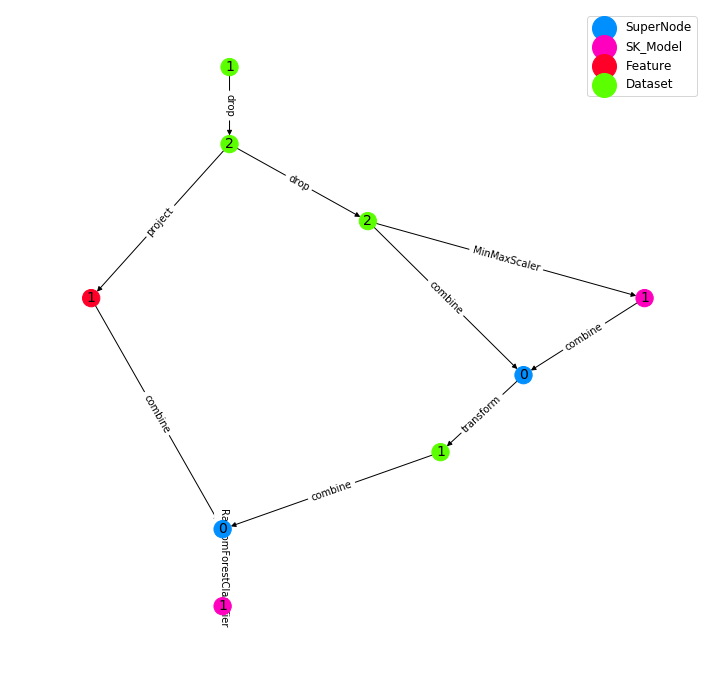

In [5]:
ee.workload_graph.plot_graph(plt, edge_oper=True)

In [6]:
ee_2 = ExecutionEnvironment('dedup')
ee_2.load_history(DATABASE_PATH)

In [7]:
# Load Data
train = ee_2.load(root_data + '/openml/task_id=31/train.csv')

# Transformation 1
train = train.drop(columns=['checking_status'])

# Transformation 2
train_labels = train['class']
train = train.drop(columns=['class'])

# Transformation 3
from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)

# Model Training
from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
random_forest.fit(train, train_labels)

# Execute
random_forest.trained_node.data(verbose=1)

materialized nodes = {'96C4A8A0': '1BD4F1C8', '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv': '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv', '7B6AA8DB': 'DBC33FBA', '8D090677': '8353BC20', '2B30EF94': '70C81ACA'}
size of the optimized graph = 7
2B30EF94 True
51E51A5D8D090677 False
51E51A5D False
7B6AA8DB2B30EF94 False
8D090677 True
96C4A8A0 True
/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/data/openml/task_id=31/train.csv True
EEA161CD False
7B6AA8DB True
2B30EF94--fit_sk_model({'model':MinMaxScaler(copy=True,feature_range=(0,1))})->7B6AA8DB
7B6AA8DB--combine({})->7B6AA8DB2B30EF94
8D090677--combine({})->51E51A5D8D090677
2B30EF94--combine({})->7B6AA8DB2B30EF94
7B6AA8DB2B30EF94--transform({})->51E51A5D
51E51A5D--combine({})->51E51A5D8D090677
51E51A5D8D090677--fit_sk_model_with_labels({'custom_args':None,'model':RandomForestC

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [8]:
ee_2.workload_graph.graph.nodes(data=True)

NodeDataView({'2B30EF94': {'root': False, 'size': 0.13176727294921875, 'type': 'Dataset', 'data': <experiment_graph.execution_environment.Dataset object at 0x10d6a7b10>}, '51E51A5D8D090677': {'type': 'SuperNode', 'size': 0.0, 'root': False, 'data': <experiment_graph.execution_environment.SuperNode object at 0x10d68a790>}, '51E51A5D': {'root': False, 'size': 0.13176727294921875, 'type': 'Dataset', 'data': <experiment_graph.execution_environment.Dataset object at 0x1054e80d0>}, '7B6AA8DB2B30EF94': {'type': 'SuperNode', 'size': 0.0, 'root': False, 'data': <experiment_graph.execution_environment.SuperNode object at 0x10d6a7bd0>}, '7B6AA8DB': {'root': False, 'size': 6.103515625e-05, 'type': 'SK_Model', 'data': <experiment_graph.execution_environment.SK_Model object at 0x10d2372d0>}, '96C4A8A0': {'root': False, 'size': 0.138702392578125, 'type': 'Dataset', 'data': <experiment_graph.execution_environment.Dataset object at 0x10d428490>}, '/Users/bede01/Documents/work/phd-papers/ml-workload-opt